## Problem Statement

Predict the bike-sharing counts per hour based on the features including weather, day, time, humidity, wind speed, season e.t.c.

## Learning Objectives

At the end of the mini-project, you will be able to :

* perform data exploration and visualization
* implement linear regression using sklearn and optimization
* apply regularization on regression using Lasso, Ridge and Elasticnet techniques
* calculate and compare the MSE value of each regression technique
* analyze the features that are best contributing to the target

### Dataset

The dataset chosen for this mini-project is [Bike Sharing Dataset](https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset).  This dataset contains the hourly and daily count of rental bikes between the years 2011 and 2012 in the capital bike share system with the corresponding weather and seasonal information. This dataset consists of 17389 instances of 16 features.

Bike sharing systems are a new generation of traditional bike rentals where the whole process from membership, rental and return has become automatic. Through these systems, the user can easily rent a bike from a particular position and return to another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousand bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. As opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position are explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that the most important events in the city could be detected via monitoring these data.

<img src="https://s26551.pcdn.co/wp-content/uploads/2012/02/resize-va-sq-bikeshare.jpg" alt="drawing" width="400"/>

### Data Fields

* dteday - hourly date
* season - 1 = spring, 2 = summer, 3 = fall, 4 = winter
* hr - hour
* holiday - whether the day is considered a holiday
* workingday - whether the day is neither a weekend nor holiday
* weathersit -<br>
    1 - Clear, Few clouds, Partly cloudy, Partly cloudy <br>
    2 - Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br>
    3 - Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br>
    4 - Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog<br>   
* temp - temperature in Celsius
* atemp - "feels like" temperature in Celsius
* humidity - relative humidity
* windspeed - wind speed
* casual - number of non-registered user rentals initiated
* registered - number of registered user rentals initiated
* cnt - number of total rentals

## Information

**Regularization:** It is a form of regression that shrinks the coefficient estimates towards zero. In other words, this technique discourages learning a more complex or flexible model, to avoid the risk of overfitting. A simple relation for linear regression looks like this.

$Y ≈ β_0 + β_1 X_1 + β_2 X_2 + …+ β_p X_p$

 Here $Y$ represents the learned relation and $β$ represents the coefficient estimates for different variables or predictors(X).

 If there is noise in the training data, then the estimated coefficients won’t generalize well to the future data. This is where regularization comes in and shrinks or regularizes these learned estimates towards zero.

Below are the Regularization techniques:

 * Ridge Regression
 * Lasso Regression
 * Elasticnet Regression

## Grading = 10 Points

In [ ]:
#@title Download the dataset
!wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/Bike_Sharing_Dataset.zip
!unzip Bike_Sharing_Dataset.zip

Archive:  Bike_Sharing_Dataset.zip
  inflating: Readme.txt              
  inflating: day.csv                 
  inflating: hour.csv                


#### Importing Necessary Packages

In [ ]:
# Loading the Required Packages
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score

### Data Loading

In [ ]:
# Read the hour.csv file
# YOUR CODE HERE
bike_sharing_df = pd.read_csv('hour.csv')

print the first five rows of dataset

In [ ]:
# YOUR CODE HERE
bike_sharing_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


print the datatypes of the columns

In [ ]:
# YOUR CODE HERE
print(bike_sharing_df.dtypes)

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


### Task flow with respect to feature processing and model training

* Explore and analyze the data

* Identify continuous features and categorical features

* Apply scaling on continuous features and one-hot encoding on categorical features

* Separate the features, targets and split the data into train and test

* Find the coefficients of the features using normal equation and find the cost (error)

* Apply batch gradient descent technique and find the best coefficients

* Apply SGD Regressor using sklearn

* Apply linear regression using sklearn

* Apply Lasso, Ridge, Elasticnet Regression

### EDA &  Visualization ( 2 points)

#### Visualize the hour (hr) column with an appropriate plot and find the busy hours of bike sharing

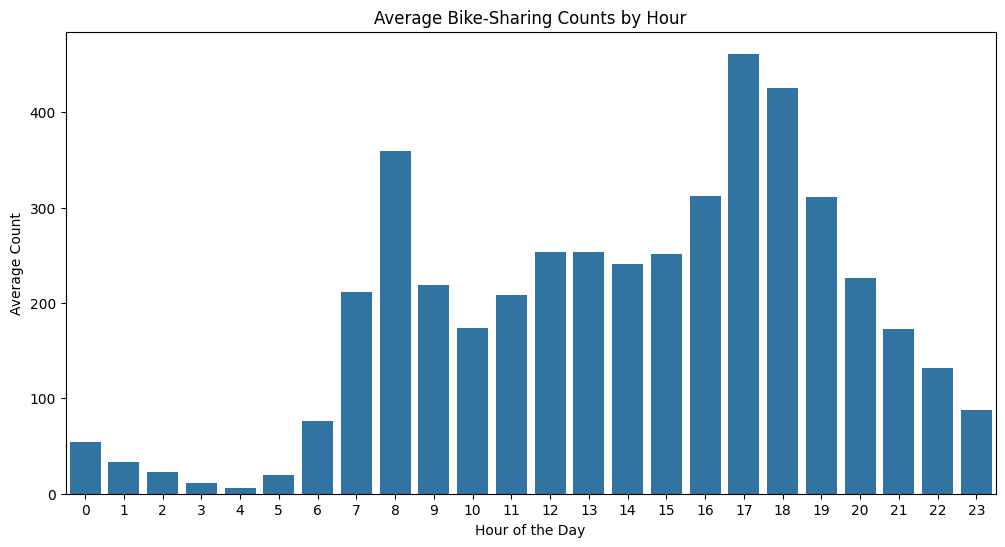

In [ ]:
# YOUR CODE HERE
import matplotlib.pyplot as plt
import seaborn as sns

# Group data by hour and calculate average bike-sharing count
hourly_counts = bike_sharing_df.groupby('hr')['cnt'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='hr', y='cnt', data=hourly_counts)
plt.title('Average Bike-Sharing Counts by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Count')
plt.show()

#### Visualize the distribution of count, casual and registered variables

Text(0, 0.5, 'Frequency')

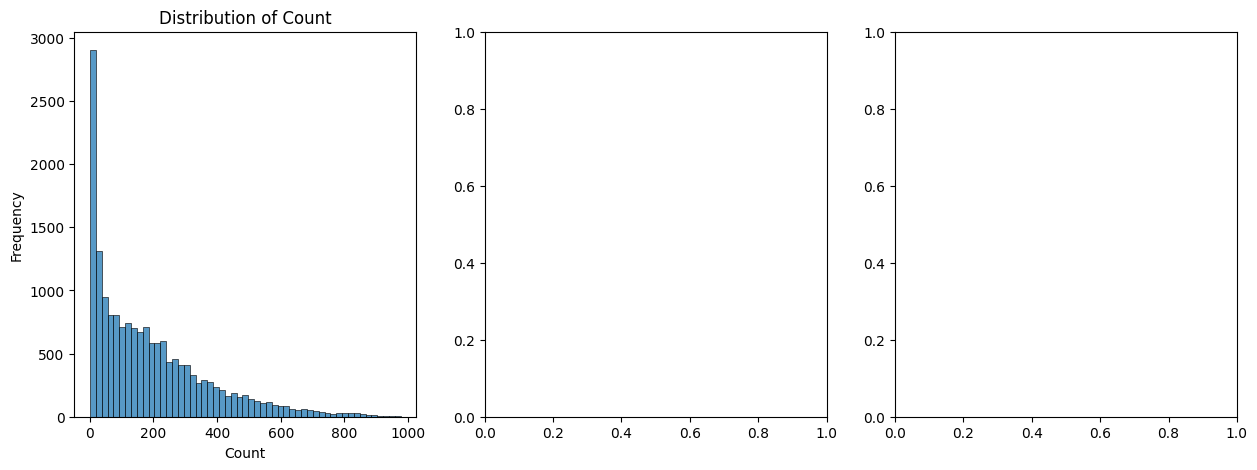

In [ ]:
# YOUR CODE HERE for distribuiton of count variable
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots for each variable
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Distribution of count variable
sns.histplot(bike_sharing_df['cnt'], ax=axes[0])
axes[0].set_title('Distribution of Count')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Frequency')


In [ ]:
# YOUR CODE HERE for distribuiton of casual variable
# Distribution of casual variable
sns.histplot(bike_sharing_df['casual'], ax=axes[1])
axes[1].set_title('Distribution of Casual')
axes[1].set_xlabel('Casual')
axes[1].set_ylabel('Frequency')

Text(447.4191176470589, 0.5, 'Frequency')

In [ ]:
# YOUR CODE HERE for distribuiton of registered variable
# Distribution of registered variable
sns.histplot(bike_sharing_df['registered'], ax=axes[2])
axes[2].set_title('Distribution of Registered')
axes[2].set_xlabel('Registered')
axes[2].set_ylabel('Frequency')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

#### Describe the relation of weekday, holiday and working day

In [ ]:
# YOUR CODE HERE
# Create a DataFrame with the relevant columns
weekday_holiday_workingday = bike_sharing_df[['weekday', 'holiday', 'workingday']]

# Display unique combinations and their counts
print(weekday_holiday_workingday.value_counts())

weekday  holiday  workingday
6        0        0             2512
0        0        0             2502
3        0        1             2451
5        0        1             2439
2        0        1             2430
4        0        1             2423
1        0        1             2122
         1        0              357
4        1        0               48
5        1        0               48
3        1        0               24
2        1        0               23
Name: count, dtype: int64


#### Visualize the month wise count of both casual and registered for the year 2011 and 2012 separately.

Hint: Stacked barchart

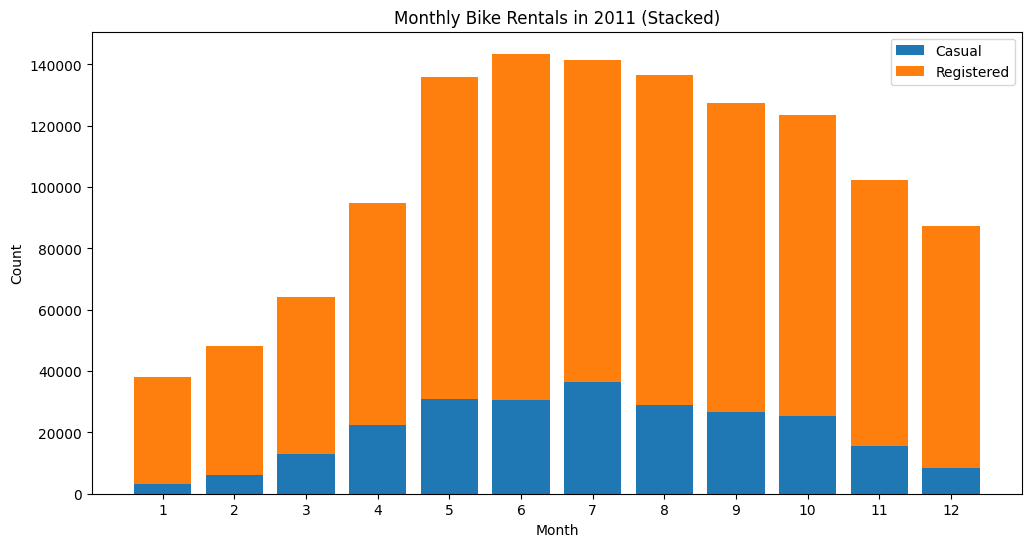

In [ ]:
# stacked bar chart for year 2011
# YOUR CODE HERE
import matplotlib.pyplot as plt
import pandas as pd

# Filter data for the year 2011
df_2011 = bike_sharing_df[pd.to_datetime(bike_sharing_df['dteday']).dt.year == 2011]

# Group data by month and sum casual and registered rentals
monthly_counts_2011 = df_2011.groupby(pd.to_datetime(df_2011['dteday']).dt.month)[['casual', 'registered']].sum().reset_index()

# Rename the 'dteday' column to 'month' for clarity
monthly_counts_2011.rename(columns={monthly_counts_2011.columns[0]: "month"}, inplace=True)

# Create the stacked bar chart
plt.figure(figsize=(12, 6))
plt.bar(monthly_counts_2011['month'], monthly_counts_2011['casual'], label='Casual')
plt.bar(monthly_counts_2011['month'], monthly_counts_2011['registered'], bottom=monthly_counts_2011['casual'], label='Registered')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Monthly Bike Rentals in 2011 (Stacked)')
plt.xticks(monthly_counts_2011['month'])  # Set x-axis ticks to show all months
plt.legend()
plt.show()

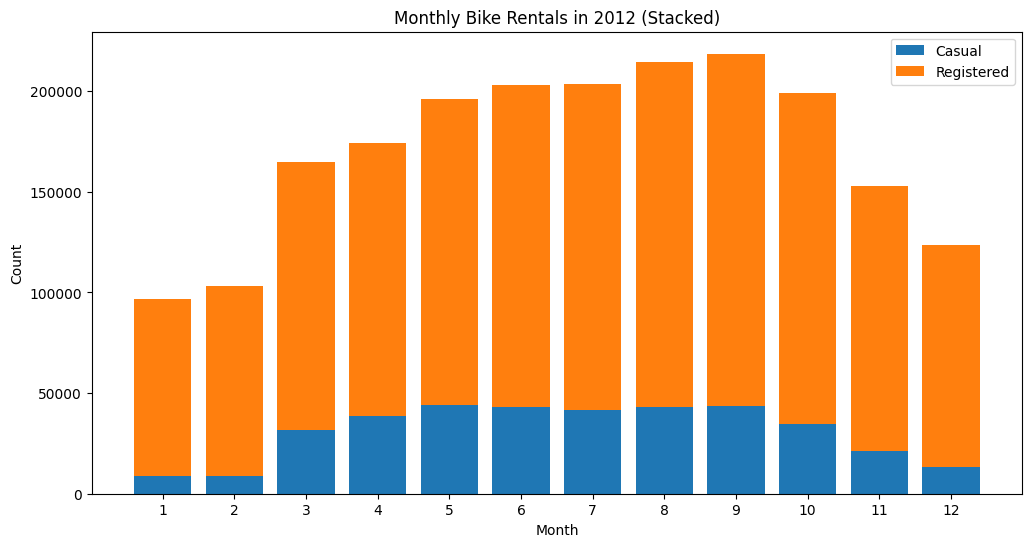

In [ ]:
# stacked bar chart for year 2012
# YOUR CODE HERE
import matplotlib.pyplot as plt
import pandas as pd

# Filter data for the year 2012
df_2012 = bike_sharing_df[pd.to_datetime(bike_sharing_df['dteday']).dt.year == 2012]

# Group data by month and sum casual and registered rentals
monthly_counts_2012 = df_2012.groupby(pd.to_datetime(df_2012['dteday']).dt.month)[['casual', 'registered']].sum().reset_index()

# Rename the 'dteday' column to 'month' for clarity
monthly_counts_2012.rename(columns={monthly_counts_2012.columns[0]: "month"}, inplace=True)

# Create the stacked bar chart
plt.figure(figsize=(12, 6))
plt.bar(monthly_counts_2012['month'], monthly_counts_2012['casual'], label='Casual')
plt.bar(monthly_counts_2012['month'], monthly_counts_2012['registered'], bottom=monthly_counts_2012['casual'], label='Registered')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Monthly Bike Rentals in 2012 (Stacked)')
plt.xticks(monthly_counts_2012['month'])  # Set x-axis ticks to show all months
plt.legend()
plt.show()

#### Analyze the correlation between features with heatmap

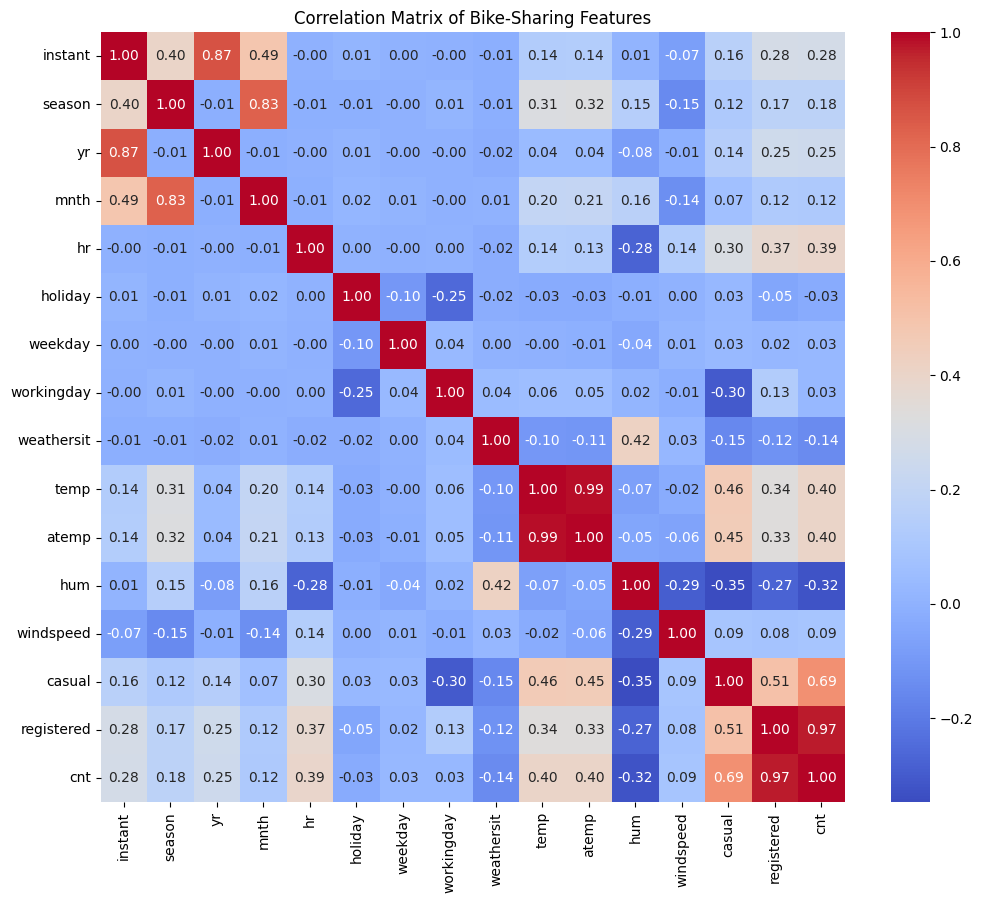

In [ ]:
# YOUR CODE HERE
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate correlation matrix, excluding non-numeric columns
correlation_matrix = bike_sharing_df.select_dtypes(include=np.number).corr()

# Create heatmap
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Bike-Sharing Features')
plt.show()

#### Visualize the box plot of casual and registered variables to check the outliers

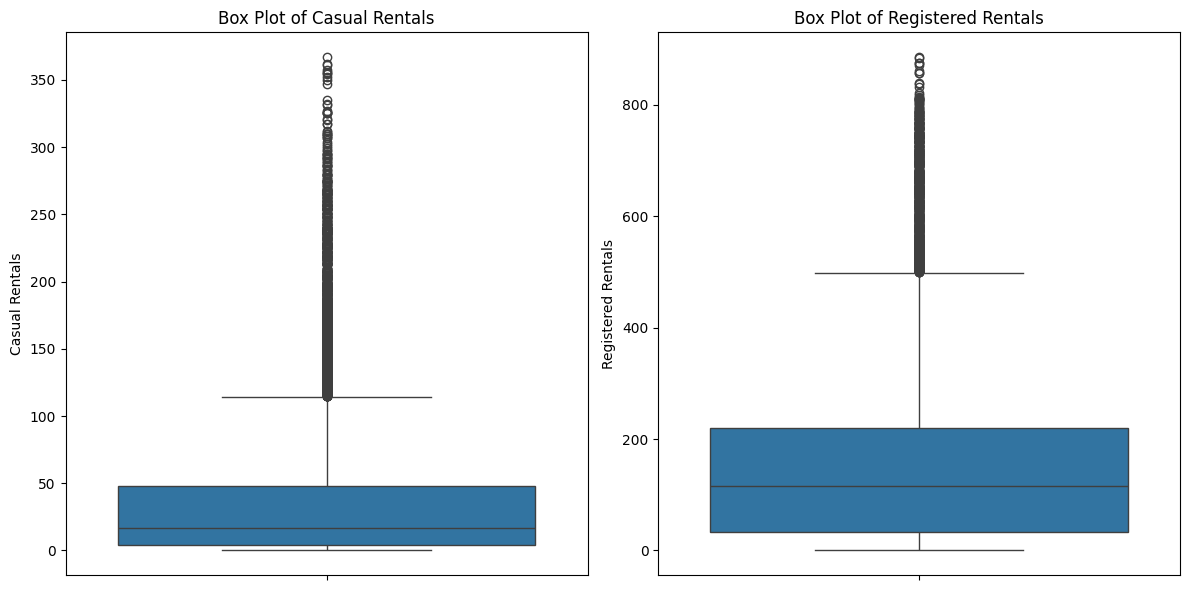

In [ ]:
# YOUR CODE HERE
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots for casual and registered variables
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Box plot for casual variable
sns.boxplot(y=bike_sharing_df['casual'], ax=axes[0])
axes[0].set_title('Box Plot of Casual Rentals')
axes[0].set_ylabel('Casual Rentals')

# Box plot for registered variable
sns.boxplot(y=bike_sharing_df['registered'], ax=axes[1])
axes[1].set_title('Box Plot of Registered Rentals')
axes[1].set_ylabel('Registered Rentals')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

### Pre-processing and Data Engineering (1 point)

#### Drop unwanted columns

In [ ]:
# YOUR CODE HERE
# YOUR CODE HERE
bike_sharing_df = bike_sharing_df.drop(['instant', 'dteday'], axis=1)

#### Identify categorical and continuous variables


In [ ]:
# YOUR CODE HERE
# YOUR CODE HERE
categorical_vars = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
continuous_vars = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

#### Feature scaling

Feature scaling is essential for machine learning algorithms, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance. Apply scaling on the continuous variables on the given data.

Hint: `MinMaxScaler` or `StandardScaler`



In [ ]:
# YOUR CODE HERE
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to the continuous variables and transform them
bike_sharing_df[continuous_vars] = scaler.fit_transform(bike_sharing_df[continuous_vars])


#### Apply one-hot encode on the categorical data

One-hot encoding is applied on the categorical variables, which should not have a different weight or order attached to them, it is presumed that all categorical variables have equivalent "values". This means that you cannot simply order them from zero to the number of categories as this would imply that the earlier categories have less "value" than later categories.

Hint: `sklearn.preprocessing.OneHotEncoder`

In [ ]:
# YOUR CODE HERE
from sklearn.preprocessing import OneHotEncoder

# Create a OneHotEncoder object
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit the encoder to the categorical variables and transform them
encoded_data = encoder.fit_transform(bike_sharing_df[categorical_vars])

# Create a DataFrame from the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_vars))

# Concatenate the encoded DataFrame with the original DataFrame
bike_sharing_df = pd.concat([bike_sharing_df, encoded_df], axis=1)

# Drop the original categorical columns
bike_sharing_df = bike_sharing_df.drop(categorical_vars, axis=1)

#### Specify features and targets after applying scaling and one-hot encoding

In [ ]:
# YOUR CODE HERE
# YOUR CODE HERE
# Features (all columns except 'cnt')
features = bike_sharing_df.drop('cnt', axis=1)

# Target ('cnt' column)
target = bike_sharing_df['cnt']

### Implement the linear regression by finding the coefficients using below approaches (2 points)

* Find the coefficients using normal equation

* (Optional) Implement batch gradient descent

* (Optional) SGD Regressor from sklearn

#### Select the features and target and split the dataset

As there are 3 target variables, choose the count (`cnt`) variable.

In [ ]:
# YOUR CODE HERE
import numpy as np
from sklearn.model_selection import train_test_split
from scipy.linalg import lstsq

# Select features and target
features = bike_sharing_df.drop('cnt', axis=1)
target = bike_sharing_df['cnt']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Add a column of ones to X_train for the intercept term
X_train = np.c_[np.ones(X_train.shape[0]), X_train]

# Calculate coefficients using the normal equation
coefficients, _, _, _ = lstsq(X_train, y_train)

# Print the coefficients
print("Coefficients:", coefficients)

Coefficients: [-1.29293871e-02  1.62370117e-15 -1.26287869e-15 -6.38378239e-16
 -1.30104261e-16  3.76024590e-01  9.07786885e-01  9.89831592e-04
  9.89831592e-04  9.89831592e-04  9.89831592e-04  2.22564677e-03
  2.22564677e-03  3.23497922e-04  3.23497922e-04  3.23497922e-04
  3.23497922e-04  3.23497922e-04  3.23497922e-04  3.23497922e-04
  3.23497922e-04  3.23497922e-04  3.23497922e-04  3.23497922e-04
  3.23497922e-04  1.63266484e-04  1.63266484e-04  1.63266484e-04
  1.63266484e-04  1.63266484e-04  1.63266484e-04  1.63266484e-04
  1.63266484e-04  1.63266484e-04  1.63266484e-04  1.63266484e-04
  1.63266484e-04  1.63266484e-04  1.63266484e-04  1.63266484e-04
  1.63266484e-04  1.63266484e-04  1.63266484e-04  1.63266484e-04
  1.63266484e-04  1.63266484e-04  1.63266484e-04  1.63266484e-04
  1.63266484e-04  3.77638993e-03  3.01275591e-03  1.69558896e-05
  7.80589910e-04  7.80589910e-04  7.80589910e-04  7.80589910e-04
  7.80589910e-04  1.69558896e-05  3.06582785e-03  2.30219383e-03
  1.3433804

#### Implementation using Normal Equation

$\theta = (X^T X)^{-1} . (X^T Y)$

$θ$ is the hypothesis parameter that defines the coefficients

$X$ is the input feature value of each instance

$Y$ is Output value of each instance

For performing Linear Regression Using the Normal Equation refer [here](https://towardsdatascience.com/performing-linear-regression-using-the-normal-equation-6372ed3c57).

To solve the normal equation compute least-squares solution by using `scipy.linalg`

Hint: [scipy.linalg.lstsq](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lstsq.html)

In [ ]:
# YOUR CODE HERE
import numpy as np
from sklearn.model_selection import train_test_split
from scipy.linalg import lstsq

# Select features and target
features = bike_sharing_df.drop('cnt', axis=1)
target = bike_sharing_df['cnt']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Add a column of ones to X_train for the intercept term
X_train = np.c_[np.ones(X_train.shape[0]), X_train]

# Calculate coefficients using the normal equation
coefficients, _, _, _ = lstsq(X_train, y_train)

# Print the coefficients
print("Coefficients:", coefficients)

# Make predictions on the test set
X_test_with_intercept = np.c_[np.ones(X_test.shape[0]), X_test]  # Add intercept to test data
y_pred = X_test_with_intercept @ coefficients

# Calculate the cost (error) - Mean Squared Error
cost = np.mean((y_pred - y_test)**2)
print("Cost (MSE):", cost)

Coefficients: [-1.29293871e-02  1.62370117e-15 -1.26287869e-15 -6.38378239e-16
 -1.30104261e-16  3.76024590e-01  9.07786885e-01  9.89831592e-04
  9.89831592e-04  9.89831592e-04  9.89831592e-04  2.22564677e-03
  2.22564677e-03  3.23497922e-04  3.23497922e-04  3.23497922e-04
  3.23497922e-04  3.23497922e-04  3.23497922e-04  3.23497922e-04
  3.23497922e-04  3.23497922e-04  3.23497922e-04  3.23497922e-04
  3.23497922e-04  1.63266484e-04  1.63266484e-04  1.63266484e-04
  1.63266484e-04  1.63266484e-04  1.63266484e-04  1.63266484e-04
  1.63266484e-04  1.63266484e-04  1.63266484e-04  1.63266484e-04
  1.63266484e-04  1.63266484e-04  1.63266484e-04  1.63266484e-04
  1.63266484e-04  1.63266484e-04  1.63266484e-04  1.63266484e-04
  1.63266484e-04  1.63266484e-04  1.63266484e-04  1.63266484e-04
  1.63266484e-04  3.77638993e-03  3.01275591e-03  1.69558896e-05
  7.80589910e-04  7.80589910e-04  7.80589910e-04  7.80589910e-04
  7.80589910e-04  1.69558896e-05  3.06582785e-03  2.30219383e-03
  1.3433804

#### (Optional) Implementing Linear regression using batch gradient descent

Initialize the random coefficients and optimize the coefficients in the iterative process by calculating cost and finding the gradient.

Hint: [gradient descent](https://medium.com/@lope.ai/multivariate-linear-regression-from-scratch-in-python-5c4f219be6a)

In [ ]:
# YOUR CODE HERE
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Select features and target
features = bike_sharing_df.drop('cnt', axis=1)
target = bike_sharing_df['cnt']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Add a column of ones to X_train for the intercept term
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

# Initialize coefficients randomly
coefficients = np.random.rand(X_train.shape[1])

# Set learning rate and number of iterations
learning_rate = 0.01
iterations = 1000

# Batch Gradient Descent
for _ in range(iterations):
    # Calculate predictions
    predictions = X_train @ coefficients

    # Calculate error
    error = predictions - y_train

    # Update coefficients
    coefficients = coefficients - learning_rate * (X_train.T @ error) / len(y_train)

# Print the coefficients
print("Coefficients (Batch Gradient Descent):", coefficients)

# Make predictions on the test set
y_pred = X_test @ coefficients

# Calculate the cost (error) - Mean Squared Error
cost = mean_squared_error(y_test, y_pred)
print("Cost (MSE):", cost)

Coefficients (Batch Gradient Descent): [-0.79694934 -0.2687597  -0.14935799 -0.37760298  0.14897031  0.6007035
  0.2910263   0.2720397   0.0200242   0.37327756  0.33580226 -0.26169634
 -0.2147944   0.08807585  0.09057162  0.4517393   0.42471425  0.64306827
  0.68651308  0.16896872  0.26170535  0.47570491  0.376621    0.06551515
  0.27907467  0.20227683  0.18450445  0.76843363  0.49328247  0.40954472
  0.69593955  0.32753176  0.61248072  0.59637199  0.25536258  0.52556768
  0.57067872  0.35927462  0.68269792  0.70185073  0.36384329  0.67797124
  0.51596501  0.83930357  0.36283761  0.39076385  0.46774195  0.70402801
  0.57501544 -0.00556248  0.32235741  0.32526587  0.44053347  0.5219742
  0.46261584  0.34608218  0.53039402  0.34728126  0.0165543  -0.03719192
  0.00322031  0.01812509  0.20107005  0.99265873]
Cost (MSE): 0.06517934605537964


#### (Optional) SGD Regressor

Scikit-learn API provides the SGDRegressor class to implement SGD method for regression problems. The SGD regressor applies regularized linear model with SGD learning to build an estimator. A regularizer is a penalty (L1, L2, or Elastic Net) added to the loss function to shrink the model parameters.

* Import SGDRegressor from sklearn and fit the data

* Predict the test data and find the error

Hint: [SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html)

In [ ]:
# YOUR CODE HERE
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Select features and target
features = bike_sharing_df.drop('cnt', axis=1)
target = bike_sharing_df['cnt']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create an SGDRegressor object
sgd_regressor = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)

# Fit the model to the training data
sgd_regressor.fit(X_train, y_train)

# Predict the test data
y_pred = sgd_regressor.predict(X_test)

# Calculate the error (Mean Squared Error)
error = mean_squared_error(y_test, y_pred)
print("Error (MSE):", error)

Error (MSE): 0.0014500755513448258


### Linear regression using sklearn (3 points)

Implement the linear regression model using sklearn

* Import Linear Regression and fit the train data

* Predict the test data and find the error

Hint: [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [ ]:
# YOUR CODE HERE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Select features and target
features = bike_sharing_df.drop('cnt', axis=1)
target = bike_sharing_df['cnt']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create a LinearRegression object
linear_regression = LinearRegression()

# Fit the model to the training data
linear_regression.fit(X_train, y_train)

# Predict the test data
y_pred = linear_regression.predict(X_test)

# Calculate the error (Mean Squared Error)
error = mean_squared_error(y_test, y_pred)
print("Error (MSE):", error)

Error (MSE): 1.7417470095370648e-31


#### Calculate the $R^2$ (coefficient of determination) of the actual and predicted data

In [ ]:
# YOUR CODE HERE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# ... (previous code for linear regression using sklearn) ...

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 1.0


#### Summarize the importance of features

Prediction is the weighted sum of the input values e.g. linear regression. Regularization, such as ridge regression and the elastic net, find a set of coefficients to use in the weighted sum to make a prediction. These coefficients can be used directly as a crude type of feature importance score.
This assumes that the input variables have the same scale or have been scaled prior to fitting a model.

Use the coefficients obtained through the sklearn Linear Regression implementation and create a bar chart of the coefficients.

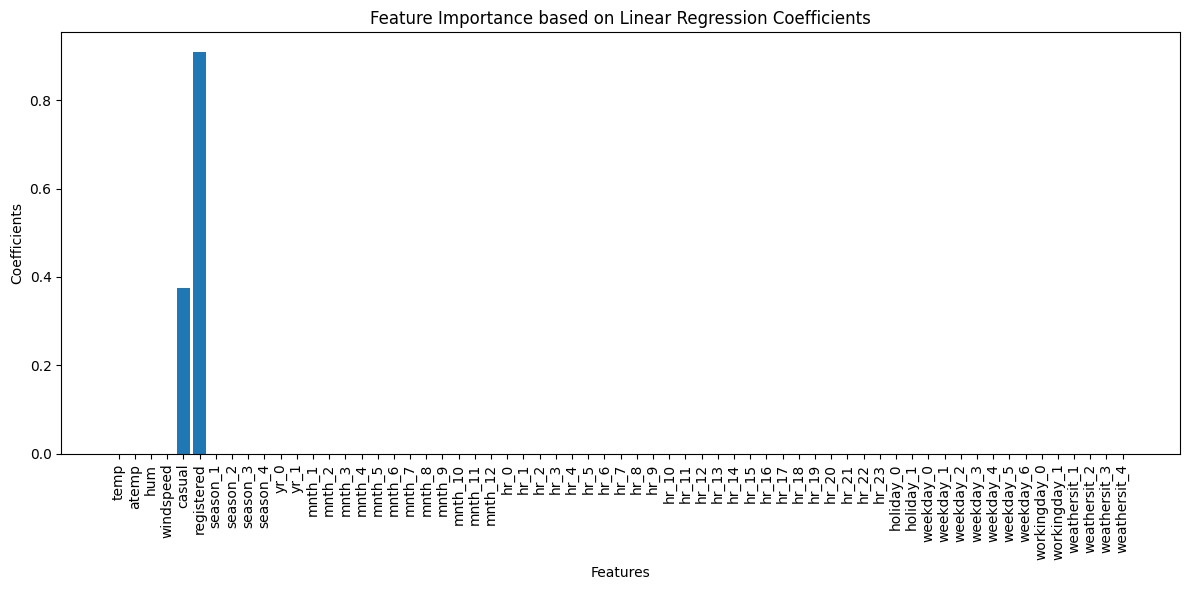

In [ ]:
# YOUR CODE HERE
import matplotlib.pyplot as plt
import numpy as np

# ... (previous code for linear regression using sklearn) ...

# Get feature names
feature_names = features.columns

# Get coefficients
coefficients = linear_regression.coef_

# Create bar chart
plt.figure(figsize=(12, 6))
plt.bar(feature_names, coefficients)
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.xlabel("Features")
plt.ylabel("Coefficients")
plt.title("Feature Importance based on Linear Regression Coefficients")
plt.tight_layout()
plt.show()

### Regularization methods (2 points)

#### Apply Lasso regression

* Apply Lasso regression with different alpha values given below and find the best alpha that gives the least error.
* Calculate the metrics for the actual and predicted

Hint: [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)

In [ ]:
# setting up alpha
alpha = [0.0001, 0.001,0.01, 0.1, 1, 10, 100]

In [ ]:
# YOUR CODE HERE
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Select features and target
features = bike_sharing_df.drop('cnt', axis=1)
target = bike_sharing_df['cnt']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Alpha values to test
alpha_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

best_alpha = None
best_mse = float('inf')  # Initialize with a very large value

for alpha in alpha_values:
    # Create a Lasso regression model with the current alpha
    lasso_model = Lasso(alpha=alpha)

    # Fit the model to the training data
    lasso_model.fit(X_train, y_train)

    # Predict on the test data
    y_pred = lasso_model.predict(X_test)

    # Calculate Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)

    # Update best alpha if current alpha gives lower MSE
    if mse < best_mse:
        best_mse = mse
        best_alpha = alpha

# Print the best alpha and corresponding MSE
print("Best alpha:", best_alpha)
print("Best MSE:", best_mse)

# Train the final model with the best alpha
final_lasso_model = Lasso(alpha=best_alpha)
final_lasso_model.fit(X_train, y_train)

# Predict on the test data using the final model
y_pred_final = final_lasso_model.predict(X_test)

# Calculate metrics for the final model
mse_final = mean_squared_error(y_test, y_pred_final)
r2_final = r2_score(y_test, y_pred_final)

print("Final MSE:", mse_final)
print("Final R-squared:", r2_final)

Best alpha: 0.0001
Best MSE: 5.682841269005447e-07
Final MSE: 5.682841269005447e-07
Final R-squared: 0.9999829045700775


#### Apply Ridge regression

* Apply Ridge regression with different alpha values given and find the best alpha that gives the least error.
* Calculate the metrics for the actual and predicted

Hint: [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

In [ ]:
# YOUR CODE HERE
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Select features and target
features = bike_sharing_df.drop('cnt', axis=1)
target = bike_sharing_df['cnt']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Alpha values to test
alpha_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

best_alpha = None
best_mse = float('inf')  # Initialize with a very large value

for alpha in alpha_values:
    # Create a Ridge regression model with the current alpha
    ridge_model = Ridge(alpha=alpha)

    # Fit the model to the training data
    ridge_model.fit(X_train, y_train)

    # Predict on the test data
    y_pred = ridge_model.predict(X_test)

    # Calculate Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)

    # Update best alpha if current alpha gives lower MSE
    if mse < best_mse:
        best_mse = mse
        best_alpha = alpha

# Print the best alpha and corresponding MSE
print("Best alpha:", best_alpha)
print("Best MSE:", best_mse)

# Train the final model with the best alpha
final_ridge_model = Ridge(alpha=best_alpha)
final_ridge_model.fit(X_train, y_train)

# Predict on the test data using the final model
y_pred_final = final_ridge_model.predict(X_test)

# Calculate metrics for the final model
mse_final = mean_squared_error(y_test, y_pred_final)
r2_final = r2_score(y_test, y_pred_final)

print("Final MSE:", mse_final)
print("Final R-squared:", r2_final)

Best alpha: 0.0001
Best MSE: 4.5056757425676305e-15
Final MSE: 4.5056757425676305e-15
Final R-squared: 0.9999999999998644


#### Apply Elasticnet regression

* Apply Elasticnet regression with different alpha values given and find the best alpha that gives the least error.
* Calculate the metrics for the actual and predicted

Hint: [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)

In [ ]:
# YOUR CODE HERE
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Select features and target
features = bike_sharing_df.drop('cnt', axis=1)
target = bike_sharing_df['cnt']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Alpha values to test
alpha_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

best_alpha = None
best_mse = float('inf')  # Initialize with a very large value

for alpha in alpha_values:
    # Create an ElasticNet regression model with the current alpha
    elasticnet_model = ElasticNet(alpha=alpha)

    # Fit the model to the training data
    elasticnet_model.fit(X_train, y_train)

    # Predict on the test data
    y_pred = elasticnet_model.predict(X_test)

    # Calculate Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)

    # Update best alpha if current alpha gives lower MSE
    if mse < best_mse:
        best_mse = mse
        best_alpha = alpha

# Print the best alpha and corresponding MSE
print("Best alpha:", best_alpha)
print("Best MSE:", best_mse)

# Train the final model with the best alpha
final_elasticnet_model = ElasticNet(alpha=best_alpha)
final_elasticnet_model.fit(X_train, y_train)

# Predict on the test data using the final model
y_pred_final = final_elasticnet_model.predict(X_test)

# Calculate metrics for the final model
mse_final = mean_squared_error(y_test, y_pred_final)
r2_final = r2_score(y_test, y_pred_final)

print("Final MSE:", mse_final)
print("Final R-squared:", r2_final)

Best alpha: 0.0001
Best MSE: 3.624966705179273e-07
Final MSE: 3.624966705179273e-07
Final R-squared: 0.9999890951794452


### Determine if there is a reduction in error if two target variables are considered

Consider (`Casual, Registered`) as target and find the error by implementing Linear Regression model from sklearn

### Report Analysis

* Describe your interpretation of the methods that are used to implement linear regression covered in this mini project.
* Comment on performance of the algorithms/methods used.
* Comment about the nature of the data and fitment of linear regression for this data.
* Can you perform a non linear curve fitting using linear regression? If yes, How?
